# Sistem Pengereman Otomatis Menggunakan Logika Fuzzy Berbasis Mikrokontroller

  Kecelakaan lalu lintas adalah suatu peristiwa di jalan yang tidak disengaja, hal itu mengakibatkan korban manusia atau kerugian harta. Salah satu penyebab dari kecelakaan tersebut adalah kelalaian pengemudi pada saat mengendarai mobil, kemudian secara tiba-tiba ada obyek di depan sehingga pengemudi tidak sempatmenginjak tuas rem dan mengendalikan laju mobil. Terlebih lagi mobil tersebut melaju dengan kecepatan tinggi sehingga sulit untuk menghindar. Sebelumnya telah ada penelitian mengenai sistem pengereman secara otomatis, namun pada sistem tersebut hasil pengereman yang dilakukan masih terlalu kasar sehingga mengurangi kenyamanan pengendara. Maka dari itu untuk menghasilkan pengereman yang halus perlu dilakukan penambahan rule pada logika fuzzy yang digunakan, dan juga agar mobil dapat masuk ke daerah sempit.

##  Logika fuzzy

#### - Input:

<div class="alert alert-success">

<b>Jarak</b>

 <ul>
  <li>sangat dekat sekali = 0.1 - 60</li>
  <li>sangat dekat = 50 - 100</li>
  <li>dekat        = 90 - 180</li>
  <li>jauh         = 160 - 200</li>
    
</ul>
</div>                                                                                     

<div class="alert alert-success">

<b>Kecepatan</b>

 <ul>
  <li>Sangat rendah sekali = 0.1 - 15 </li>
  <li>Sangat rendah        = 10 - 25</li>
  <li>Rendah               = 20 - 35</li>
  <li>Sedang               = 30 - 70</li>
  <li>Tinggi               = 68 - 90</li>
  <li>Sangat tinggi        = 85 - 105</li>
  <li>Sangat tinggi sekali = 100 - 120</li>
    
</ul>
</div>                         

#### - Output: 

<div class="alert alert-success">

<b>Rem</b>

 <ul>
  <li>Sangat sedikit   = 0.1 - 20</li>
  <li>Sedikit          = 15 -35</li>
  <li>Sedang           = 30 - 60</li>
  <li>Penuh            = 59 - 90</li>
  <li>Sangat penuh     = 80 - 100</li>
    
</ul>
</div> 

#### Mengimport Library untuk fuzzy

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1.  Fuzzyfikasi

Menentukan Variabel untuk fuzzy dengan memberikan batas awal ataupun batas akhirnya (crips)                           
Menggunakan 2 input dan 1 output

In [16]:
jarak = ctrl.Antecedent(np.arange(0,210,1), 'jarak') #Antecedent sebagai input dimulai dari 0 sampai 210
kecepatan = ctrl.Antecedent(np.arange(0,125,1), 'kecepatan') #Antecedent Dimulai dari 0 sampai dengan 125
rem = ctrl.Consequent(np.arange(0,101,1), 'rem') #Consequent sebagai output dimulai dari 0 sampai dengan 101

### Menentukan Fungsi Keanggotaan 

   ####   a. Fungsi Keanggotaan Variabel input Jarak dan Tampilan dalam Kurva

   - Persamaan Garis Kurva input Jarak

$jarak[A] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x > 60 \\
         {60-x \over 60-20} & \mbox{; } 20 \leq x \leq 60 \\
         1 & \mbox{; } x < 20
        \end{array}
 \right.$
 
 $jarak[B] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 50; x > 100 \\
         {x-50 \over 75-50} & \mbox{; } 50 \leq x \leq 75 \\
         {100-x \over 100-75} & \mbox{; }75 \leq x \leq 100
        \end{array}
 \right.$
 
 $jarak[C] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 90; x > 180 \\
         {x-90 \over 135-90} & \mbox{; } 90 \leq x \leq 135 \\
         {180-x \over 180-135} & \mbox{; } 135 \leq x \leq 180
        \end{array}
 \right.$
 
 $jarak[D] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 1600; x > 200 \\
         {x-160 \over 180-60} & \mbox{; } 160 \leq x \leq 180 \\
         {200-x \over 200-180} & \mbox{; } 180 \leq x \leq 200
        \end{array}
 \right.$

C:\Users\CCservice\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


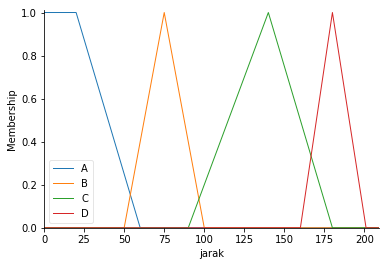

In [17]:
jarak['A'] = fuzz.trapmf(jarak.universe, [0,0,20,60]) #A = sangat dekat sekali
jarak['B'] = fuzz.trimf(jarak.universe, [50,75,100]) #B = dekat sekali
jarak['C'] = fuzz.trimf(jarak.universe, [90,140,180]) #C = dekat
jarak['D'] = fuzz.trimf(jarak.universe, [160,180,201]) #D = jauh

#jarak.view() berfungsi untuk menampilkan grafik yang telah kita atur 
jarak.view()

### b. Fungsi Keanggotaan Variabel Input Kecepatan dan Tampilan dalam Kurva

   - Persamaan Garis Variabel Kecepatan

$kecepatan[E] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x > 15 \\
         {15-x \over 15-0.1} & \mbox{; } 0.1 \leq x \leq 15 \\
        \end{array}
 \right.$
 
 $kecepatan[F] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 10; x > 25 \\
         {x-10 \over 18-10} & \mbox{; } 10 \leq x \leq 18 \\
         {25-x \over 25-19} & \mbox{; }19 \leq x \leq 25
        \end{array}
 \right.$
 
 $kecepatan[G] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 20; x > 35 \\
         {x-20 \over 28-20} & \mbox{; } 20 \leq x \leq 28 \\
         {35-x \over 38-29} & \mbox{; } 29 \leq x \leq 35
        \end{array}
 \right.$
 
 $kecepatan[H] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 30; x > 70 \\
         {x-30 \over 40-30} & \mbox{; } 30 \leq x \leq 40 \\
         1 & \mbox{; } x > 40 ; x > 60 \\
         {70-x \over 70-60} & \mbox{; } 60 \leq x \leq 70
        \end{array}
 \right.$
 
 $kecepatan[I] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 68; x > 90 \\
         {x-68 \over 79-68} & \mbox{; } 68 \leq x \leq 79 \\
         {90-x \over 90-80} & \mbox{; } 80 \leq x \leq 90
        \end{array}
 \right.$
 
 $kecepatan[J] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 85; x > 105 \\
         {x-85 \over 95-85} & \mbox{; } 85 \leq x \leq 95 \\
         {105-x \over 105-96} & \mbox{; } 96 \leq x \leq 105
        \end{array}
 \right.$
 
 $kecepatan[K] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 100 \\
         {x-100 \over 110-100} & \mbox{; } 100 \leq x \leq 110 \\
         1 & \mbox{; } x<120 ; x>110
        \end{array}
 \right.$

C:\Users\CCservice\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


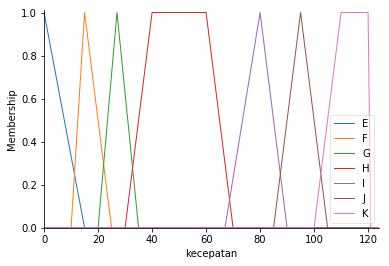

In [18]:
kecepatan['E'] = fuzz.trimf(kecepatan.universe, [0,0,15])        #E = Sangat rendah sekali
kecepatan['F'] = fuzz.trimf(kecepatan.universe, [10,15,25])      #F = Sangat rendah
kecepatan['G'] = fuzz.trimf(kecepatan.universe, [20,27,35])      #G = Rendah
kecepatan['H'] = fuzz.trapmf(kecepatan.universe, [30,40,60,70])  #H = Sedang
kecepatan['I'] = fuzz.trimf(kecepatan.universe, [67,80,90])      #I = Tinggi
kecepatan['J'] = fuzz.trimf(kecepatan.universe, [85,95,105])     #J = Sangat tinggi
kecepatan['K'] = fuzz.trapmf(kecepatan.universe, [100,110,120,120]) #K = Sangat tinggi sekali

kecepatan.view()

### c. Fungsi Keanggotaan VariabelOutput Rem dan Tampilan dalam Bantuk Kurva

 - Persamaan Garis Variabel output Rem

$rem[L] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x > 20 \\
         {20-x \over 20-0,1} & \mbox{; } 0,1 \leq x \leq 20 
        \end{array}
 \right.$
 
 $rem[M] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 15; x > 35 \\
         {x-15 \over 25-15} & \mbox{; } 15 \leq x \leq 25 \\
         {35-x \over 35-26} & \mbox{; } 26 \leq x \leq 35
        \end{array}
 \right.$
 
 $rem[N] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 30; x > 60 \\
         {x-30 \over 45-30} & \mbox{; } 30 \leq x \leq 45 \\
         {60-x \over 60-46} & \mbox{; } 46 \leq x \leq 60
        \end{array}
 \right.$
 
 $rem[O] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 60; x > 90 \\
         {x-60 \over 75-60} & \mbox{; } 60 \leq x \leq 75 \\
         {90-x \over 90-76} & \mbox{; } 76 \leq x \leq 90
        \end{array}
 \right.$
 
  $rem[P] =
\left\{
        \begin {array}{11}
         0 & \mbox{; } x < 80 \\
         {x-80 \over 100-80} & \mbox{; } 80 \leq x \leq 100
        \end{array}
 \right.$

C:\Users\CCservice\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


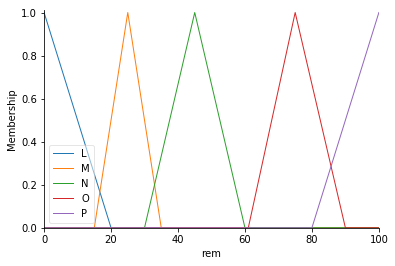

In [19]:
rem['L'] = fuzz.trimf(rem.universe, [0,0,20])     #L = Sangat sedikit
rem['M'] = fuzz.trimf(rem.universe, [15,25,35])   #M = Sedikit
rem['N'] = fuzz.trimf(rem.universe, [30,45,60])   #N = Sedang
rem['O'] = fuzz.trimf(rem.universe, [61,75,90])   #O = Penuh
rem['P'] = fuzz.trimf(rem.universe, [80,100,100]) #P = Sangat penuh

rem.view()

# 2. Rule Base dan Proses Inferens

   Dalam sistem pengereman secara otomatis ini digunakan pegontrolan logika fuzzy untuk menentukan besarnya nilai persentase rem yang akan dilakukan. Untuk masukan pada logika fuzzy itu sendiri berupa kecepatan mobil pada saat melaju dan jarak antara mobil dengan hambatan di depannya. Jumlah  rule yang digunakan pada pengontrolan logika fuzzy berjumlah 28 rule .Rule tersebut berisi perbandingan antara kecepatan mobil pada saat melaju dan jarak antara mobil dengan hambatan di depan sehingga menghasilkan nilai persentase rem yang sesuai dengan kondisi mobil pada saat melaju

Dibawah ini merupakan gambaran output yang akan ditampilkan dalam proses pengereman otomatis, disini memiliki 28 rule base dimana semuanya memiliki fungsinya masing-masing.



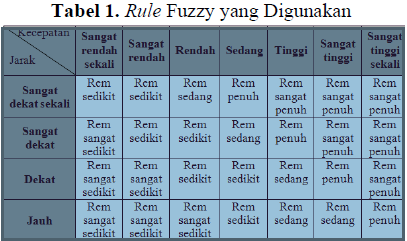

##### - Menampilkan Masing-masing Rule Base dan Proses Inferens

Tahap Inferens yaitu membuat aturan-aturan fuzzy dinyatakan dengan IF...THEN...

1. IF Kecepatan Sangat Rendah Sekali (E) AND Jarak Sangat Dekat Sekali (A) THEN keputusannya yaitu rem sedikit (M)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9d065f0>)

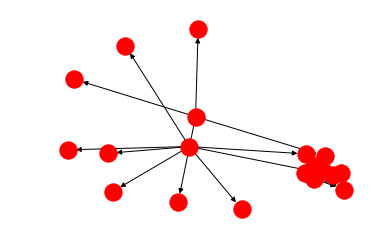

In [20]:
Rf1 = ctrl.Rule(kecepatan['E'] & jarak['A'], rem['M'])
Rf1.view()

2. IF Kecepatan Sangat Rendah (F) AND Jarak Sangat Dekat Sekali (A) THEN keputusannya yaitu rem sedikit (M)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb3300b0>)

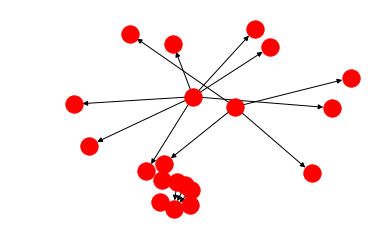

In [21]:
Rf2 = ctrl.Rule(kecepatan['F'] & jarak['A'], rem['M'])
Rf2.view()

3. IF Kecepatan Rendah (G) AND Jarak Sangat Dekat Sekali (A) THEN keputusannya yaitu rem sedang (N)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb380910>)

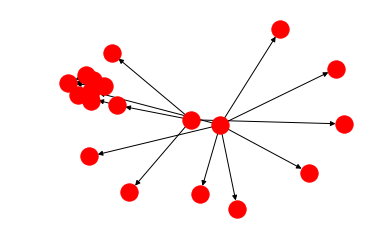

In [22]:
Rf3 = ctrl.Rule(kecepatan['G'] & jarak['A'], rem['N'])
Rf3.view()

4. IF Kecepatan Sedang (H) AND Jarak Sangat Dekat Sekali (A) THEN keputusannya yaitu rem Penuh (O)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb3c9b50>)

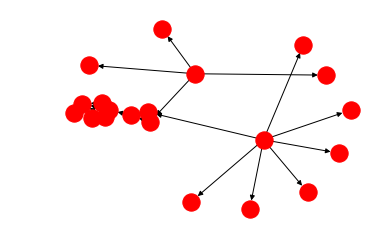

In [23]:
Rf4 = ctrl.Rule(kecepatan['H'] & jarak['A'], rem['O'])
Rf4.view()

5. IF Kecepatan Tinggi (I) AND Jarak Sangat Dekat Sekali (A) THEN keputusannya yaitu rem Sangat Penuh (P)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb414970>)

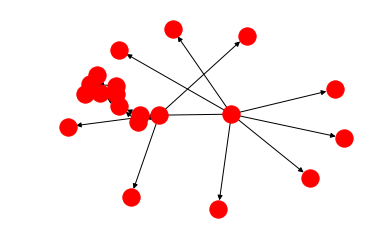

In [24]:
Rf5 = ctrl.Rule(kecepatan['I'] & jarak['A'], rem['P'])
Rf5.view()

6. IF Kecepatan Sangat Tinggi (J) AND Jarak Sangat Dekat Sekali (A) THEN keputusannya yaitu rem Sangat Penuh (P)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb46a0d0>)

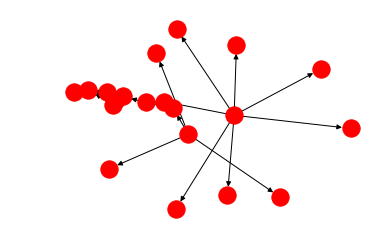

In [25]:
Rf6 = ctrl.Rule(kecepatan['J'] & jarak['A'], rem['P'])
Rf6.view()

7. IF Kecepatan Sangat Tinggi Sekali (K) AND Jarak Sangat Dekat Sekali (A) THEN keputusannya yaitu rem Sangat Penuh (P)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb4b55b0>)

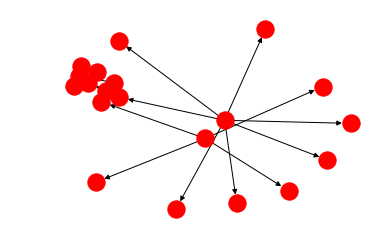

In [26]:
Rf7 = ctrl.Rule(kecepatan['K'] & jarak['A'], rem['P'])
Rf7.view()

8. IF Kecepatan Sangat Rendah Sekali (E) AND Jarak Sangat Dekat (B) THEN keputusannya yaitu rem Sangat Sedikit (L)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb4fd4f0>)

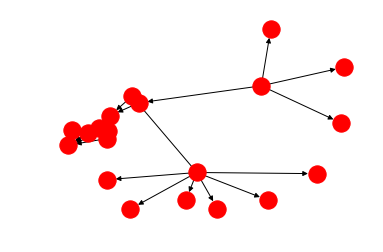

In [27]:
Rf8 = ctrl.Rule(kecepatan['E'] & jarak['B'], rem['L'])
Rf8.view()

9. IF Kecepatan Sangat Rendah (F) AND Jarak Sangat Dekat (B) THEN keputusannya yaitu rem Sedikit (M)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9d06fb0>)

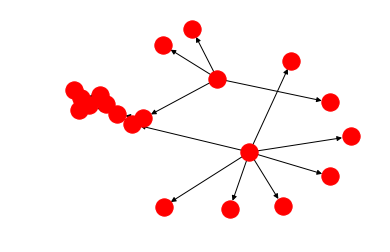

In [28]:
Rf9 = ctrl.Rule(kecepatan['F'] & jarak['B'], rem['M'])
Rf9.view()

10. IF Kecepatan Rendah (G) AND Jarak Sangat Dekat (B) THEN keputusannya yaitu rem Sedikit (M)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7af48d0>)

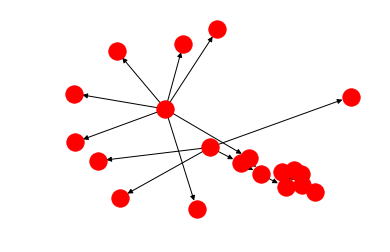

In [29]:
Rf10 = ctrl.Rule(kecepatan['G'] & jarak['B'], rem['M'])
Rf10.view()

11. IF Kecepatan Sedang (H) AND Jarak Sangat Dekat (B) THEN keputusannya yaitu rem Sedang (N)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7afceb0>)

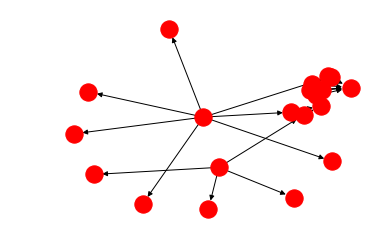

In [30]:
Rf11 = ctrl.Rule(kecepatan['H'] & jarak['B'], rem['N'])
Rf11.view()

12. IF Kecepatan Tinggi (I) AND Jarak Sangat Dekat (B) THEN keputusannya yaitu rem Penuh (O)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc50bd70>)

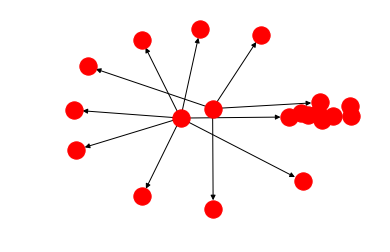

In [31]:
Rf12 = ctrl.Rule(kecepatan['I'] & jarak['B'], rem['O'])
Rf12.view()

13. IF Kecepatan Sangat Tinggi (J) AND Jarak Sangat Dekat (B) THEN keputusannya yaitu rem Sangat Penuh (P)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc561110>)

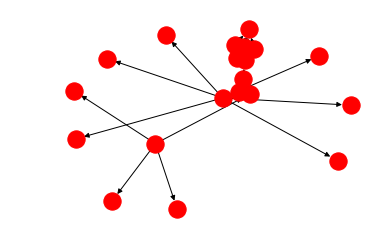

In [32]:
Rf13 = ctrl.Rule(kecepatan['J'] & jarak['B'], rem['P'])
Rf13.view()

14. IF Kecepatan Sangat Tinggi Sekali (K) AND Jarak Sangat Dekat (B) THEN keputusannya yaitu rem Sangat Penuh (P)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc5b1210>)

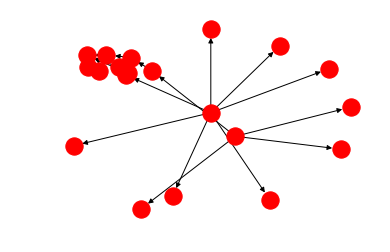

In [33]:
Rf14 = ctrl.Rule(kecepatan['K'] & jarak['B'], rem['P'])
Rf14.view()

15. IF Kecepatan Sangat Rendah Sekali (E) AND Jarak Dekat (C) THEN keputusannya yaitu rem Sangat Sedikit (L)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc5fb430>)

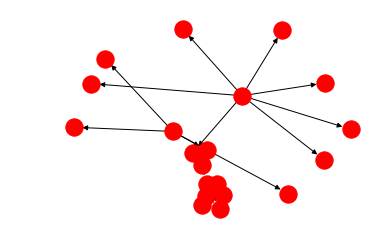

In [34]:
Rf15 = ctrl.Rule(kecepatan['E'] & jarak['C'], rem['L'])
Rf15.view()

16. IF Kecepatan Sangat Rendah (F) AND Jarak Dekat (C) THEN keputusannya yaitu rem Sangat Sedikit (L)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc646310>)

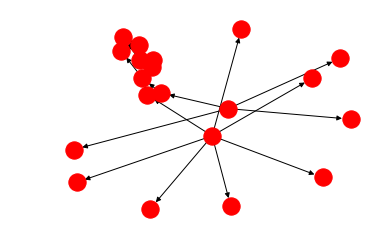

In [35]:
Rf16 = ctrl.Rule(kecepatan['F'] & jarak['C'], rem['L'])
Rf16.view()

17. IF Kecepatan Rendah (G) AND Jarak Dekat (C) THEN keputusannya yaitu rem Sedikit (M)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc692c50>)

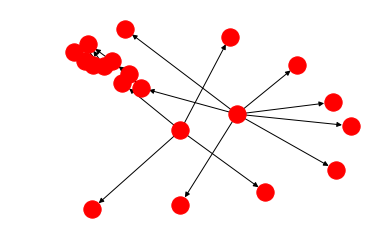

In [36]:
Rf17 = ctrl.Rule(kecepatan['G'] & jarak['C'], rem['M'])
Rf16.view()

18. IF Kecepatan Sedang (H) AND Jarak Dekat (C) THEN keputusannya yaitu rem  Sedikit (M)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc6dca70>)

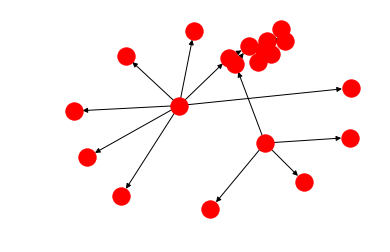

In [37]:
Rf18 = ctrl.Rule(kecepatan['H'] & jarak['C'], rem['M'])
Rf16.view()

19. IF Kecepatan Tinggi (I) AND Jarak Dekat (C) THEN keputusannya yaitu rem Sangat Sedang (N)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc733070>)

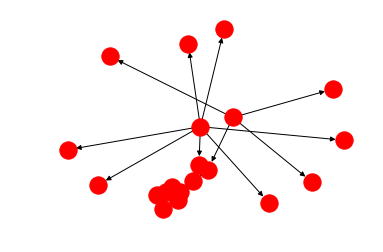

In [38]:
Rf19 = ctrl.Rule(kecepatan['I'] & jarak['C'], rem['N'])
Rf16.view()

120. IF Kecepatan Sangat Tinggii (J) AND Jarak Dekat (C) THEN keputusannya yaitu rem Penuh (O)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc77d130>)

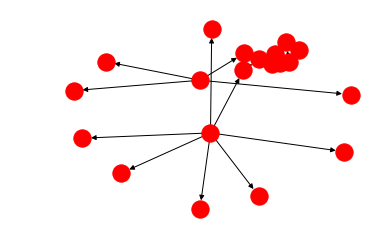

In [39]:
Rf20 = ctrl.Rule(kecepatan['J'] & jarak['C'], rem['O'])
Rf16.view()

21. IF Kecepatan Sangat Tinggi Sekali (K) AND Jarak Dekat (C) THEN keputusannya yaitu rem Sangat Penuh(P)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc7ca990>)

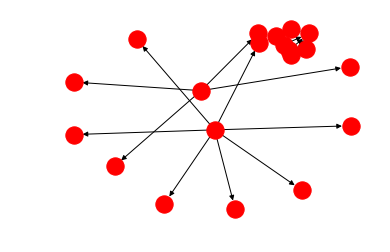

In [40]:
Rf21 = ctrl.Rule(kecepatan['K'] & jarak['C'], rem['P'])
Rf16.view()

22. IF Kecepatan Sangat Rendah Sekali (G) AND Jarak Jauh (D) THEN keputusannya yaitu rem Sangat Sedikit (L)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc816fb0>)

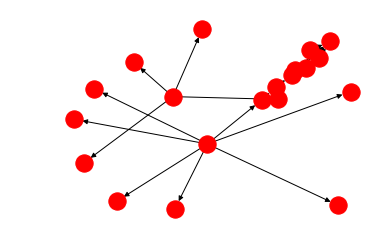

In [41]:
Rf22 = ctrl.Rule(kecepatan['E'] & jarak['D'], rem['L'])
Rf16.view()

23. IF Kecepatan Sangat Rendah (G) AND Jarak Jauh (D) THEN keputusannya yaitu rem Sangat Sedikit (L)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc86a050>)

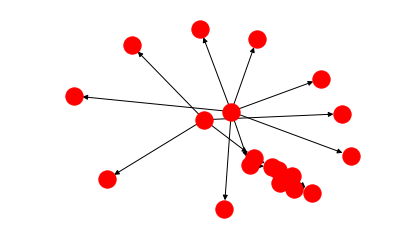

In [42]:
Rf23 = ctrl.Rule(kecepatan['F'] & jarak['D'], rem['L'])
Rf16.view()

24. IF Kecepatan Rendah (G) AND Jarak Jauh (D) THEN keputusannya yaitu rem Sangat Sedikit (L)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc8b6430>)

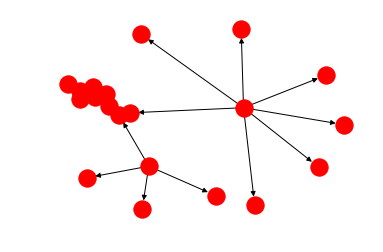

In [43]:
Rf24 = ctrl.Rule(kecepatan['G'] & jarak['D'], rem['L'])
Rf16.view()

25. IF Kecepatan Sedang (H) AND Jarak JAuh (D) THEN keputusannya yaitu rem Sedikit (M)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd8d3310>)

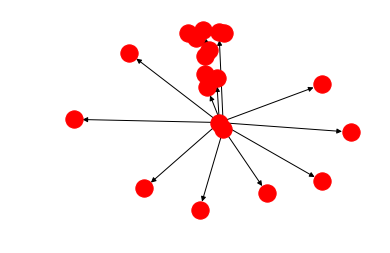

In [44]:
Rf25 = ctrl.Rule(kecepatan['H'] & jarak['D'], rem['M'])
Rf16.view()

26. IF Kecepatan Tinggi Sekali (K) AND Jarak JAuh (D) THEN keputusannya yaitu rem Sedang (N)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd91e9b0>)

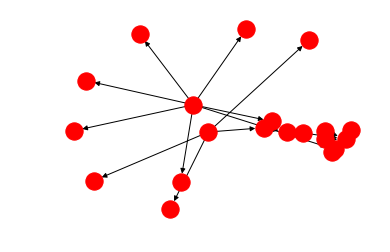

In [45]:
Rf26 = ctrl.Rule(kecepatan['I'] & jarak['D'], rem['N'])
Rf16.view()

27. IF Kecepatan Sangat Tinggi (J) AND Jarak JAuh (D) THEN keputusannya yaitu rem Sedang (N)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd969cb0>)

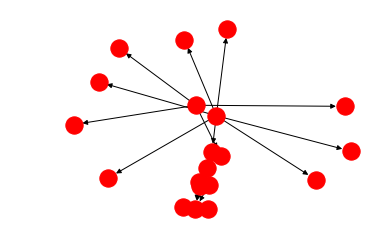

In [46]:
Rf27 = ctrl.Rule(kecepatan['J'] & jarak['D'], rem['N'])
Rf16.view()

28. IF Kecepatan Sangat Tinggi Sekali (K) AND Jarak Jauh(D) THEN keputusannya yaitu rem Penuh (O)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd9c1150>)

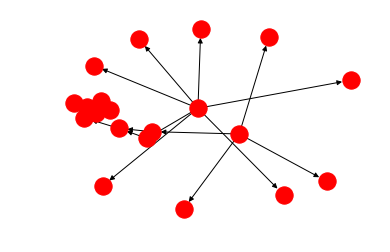

In [47]:
Rf28 = ctrl.Rule(kecepatan['K'] & jarak['D'], rem['O'])
Rf16.view()

Gambaran dari sistem yang telah dibuat yaitu prototype mobil dikendalikan oleh remote control dengan memberikan perintah menambah kecepatan, mengurangi kecepatan. Pada saat mobil melaju dan secara tiba-tiba ada hambatan di depan mobil maka sensor ultrasonik akan mengidentifikasi jarak antara mobil dengan hambatan tersebut.

#### -Simulasi dengan memasukan nilai

In [48]:
leni1 = ctrl.ControlSystem ([Rf1, Rf2, Rf3, Rf4, Rf5, Rf6, Rf7, Rf8, Rf9, Rf10, Rf11, Rf12, Rf13, Rf14, Rf15, Rf16, 
Rf17, Rf18, Rf19, Rf20, Rf21, Rf22, Rf23, Rf24, Rf25, Rf26, Rf27, Rf28])

In [49]:
leni = ctrl.ControlSystemSimulation (leni1)

CASE : rem sangat penuh

1. Pengujian pengereman pada saat kecepatan Tinggi
    dengan menempatkan hambatan didepan mobil dengan jarak lebih dari 1cm. dan melakukan perlambatan pada kecepatan hingga 120 cm/s. pengendara seharusnya melakukan pengereman sangat penuh mulai dari 80%-100%.


In [50]:
leni.input['kecepatan'] = 120
leni.input['jarak'] = 10

# 3. Menampilkan Grafik dari hasil inferens dan Defuzzyfikasi

93.33333333333331


C:\Users\CCservice\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


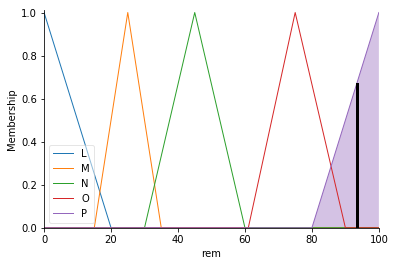

In [51]:
leni.compute()
print (leni.output['rem'])
rem.view(sim=leni)

#### - Penyelesaian dengan Hitungan Manual Defuzzyfikasi

$ Mencari nilai X :\\
    X1 = 80+1/3 x(97-80) =80+1/3 x 15 = 88,5 \\
    X2 = 97+1/3 x(100-97) = 97+1/3 x 9 = 98,5
    $

$ Mencari nilai A : \\
    A1 = 1/2 x (97-80) x 0.7 = 5,95 \\
    A2 = 1/2 x (100-97) x 0.7 = 1,05
   $

- $ x =
    \begin{array}{11}
    {(X1xA1)+(X2xA2)\over A1+A2}
    \end {array}$
    
    $ x =
    \begin{array}{11}
    {(88,5 x 5,95)+(98,5 x 1,05)\over 5,95 + 1,05}
    \end {array}$
    
    $ x =
    \begin{array}{11}
    {(526,575)+(103,425)\over 7}
    \end {array} = 92,886665 $

Sumber : http://telekontran.te.unikom.ac.id/_s/data/jurnal/volume-04/telekontran-vol-4-no-1-april-2016-fix-paper-1-aris-munandar-muhammad-aria.pdf/pdf/telekontran-vol-4-no-1